In [179]:
import numpy as np
import pandas as pd
from IPython.display import HTML
from matplotlib.animation import FuncAnimation, PillowWriter
import itertools
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

In [180]:

#####  -----------------CODE BLOCK CONSISTS OF ALL THE COMMON METHODS USED THROUGH OUT THIS PROJECT ----------------####

#Load the dataset
def load_iris_data():
  return load_iris()

def generate_featurelist():
  return load_iris().feature_names


def split_test_train(iris_data):
  iris_x,iris_y=iris_data.data,iris_data.target
  iris_x_train ,iris_x_test ,iris_y_train ,iris_y_test=train_test_split ( iris_x, iris_y ,test_size  =0.1 ,random_state =81)
  return iris_x_train ,iris_x_test ,iris_y_train ,iris_y_test

def define_species_names(iris_y_train):
  species_names=list()
  for i in iris_y_train:
      if i == 0:
          species_names.append('setosa')
      elif i == 1:
          species_names.append('versicolor')
      else:
          species_names.append('virginica')

  return species_names

def generate_combinations():
  generate_four=list(range(4))
  random_arr=(generate_four,2)
  random_array_list=list(random_arr)
  return list(itertools.combinations(list(range(4)),2))


def generate_scatterplot_arguments(dataset, j, type):
  if type==1:
    scatterargument_one=dataset[:,j[0]]
    scatterargument_two=dataset[:,j[1]]
  else:
    scatterargument_two=dataset[:,j[0]]
    scatterargument_one=dataset[:,j[1]]
  return scatterargument_one, scatterargument_two


def set_labels(dataset, featurelist,j, type):
  if type ==1 :
    dataset.set_xlabel(featurelist[j[0]])
    dataset.set_ylabel(featurelist[j[1]])
  else:
    dataset.set_xlabel(featurelist[j[1]])
    dataset.set_ylabel(featurelist[j[0]])

  return dataset

def generatefeatures():
  return [  'sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'  ]



def plot_scatterplot(iris_x_train ,iris_x_test ,iris_y_train ,iris_y_test, combination_list):
  
  figure1=plt.figure(figsize =[10,10])
  figure2 = plt.figure(figsize = [10,10])
  figure3 = plt.figure(figsize = [10,10])
  figure4 = plt.figure(figsize = [10,10])
  for i, j in enumerate(combination_list):
      testdata=figure1.add_subplot(3,2,i+1)
      scatterargument_one,scatterargument_two= generate_scatterplot_arguments(iris_x_test,j,1)      
      testdata.scatter(scatterargument_one,scatterargument_two,c=iris_y_test)
      testdata=set_labels(testdata,generate_featurelist(),j,1)      

      testdata = figure2.add_subplot(3,2,i+1)
      scatterargument_one,scatterargument_two= generate_scatterplot_arguments(iris_x_test,j,0)   
      testdata.scatter(scatterargument_one,scatterargument_two,c=iris_y_test)
      testdata=set_labels(testdata,generate_featurelist(),j,0)

      traindata = figure3.add_subplot(3,2,i+1)
      scatterargument_one,scatterargument_two= generate_scatterplot_arguments(iris_x_train,j,1)
      traindata.scatter(scatterargument_one,scatterargument_two,c=iris_y_train)
      traindata=set_labels(traindata,generate_featurelist(),j,1)

      traindata = figure4.add_subplot(3,2,i+1)
      scatterargument_one,scatterargument_two= generate_scatterplot_arguments(iris_x_train,j,0)
      traindata.scatter(scatterargument_one,scatterargument_two,c=iris_y_train)
      traindata=set_labels(traindata,generate_featurelist(),j,0)



def trainset_len(dataset):
  return len(dataset)


def generate_randomdataset():
  return [ [ 0 for  i in  range(3 ) ] for   j in  range( 12 ) ]

def generate_randomdatatset_lg():
  return [ [0 for  i in  range( 3)  ] for   j in range(6  )  ]

def update_randomdataarray(random_data, meansquareerror,index,random_index1,random_index2):
  features=generatefeatures()
  random_data[index][2]=meansquareerror
  random_data[index][0] =features[random_index1]
  random_data[index][1]= features[random_index2]

  return random_data

def generatetraintestdata_LinearReg(iris_x_train,iris_x_test,p,q):
  return iris_x_train[:,p],iris_x_train[:,q],iris_x_test[:,p],iris_x_test[:,q]


def generatetraintestdata_LogisticReg(iris_x_train,iris_x_test,p):
  return iris_x_train[:,p],iris_x_test[:,p]


**PLOTTING THE SCATTER PLOT**

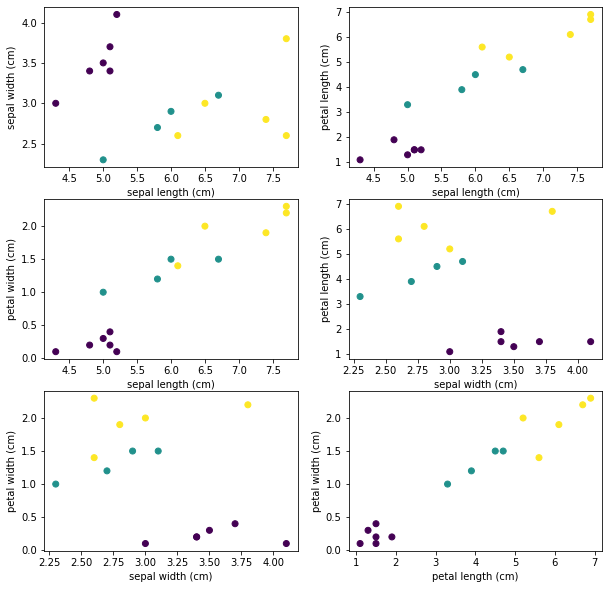

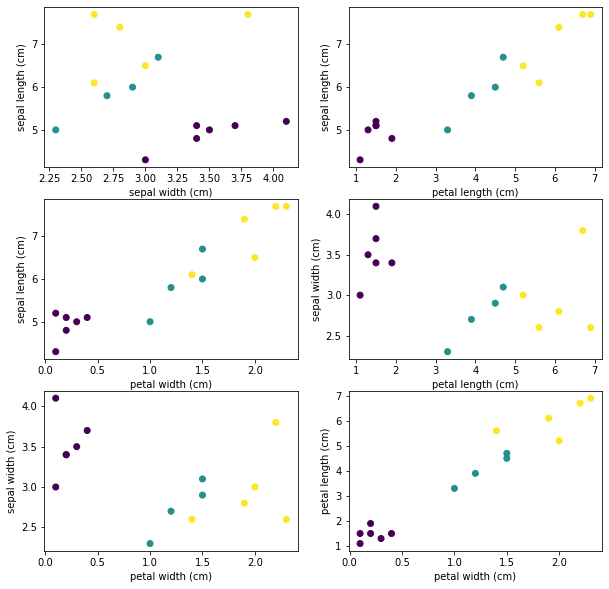

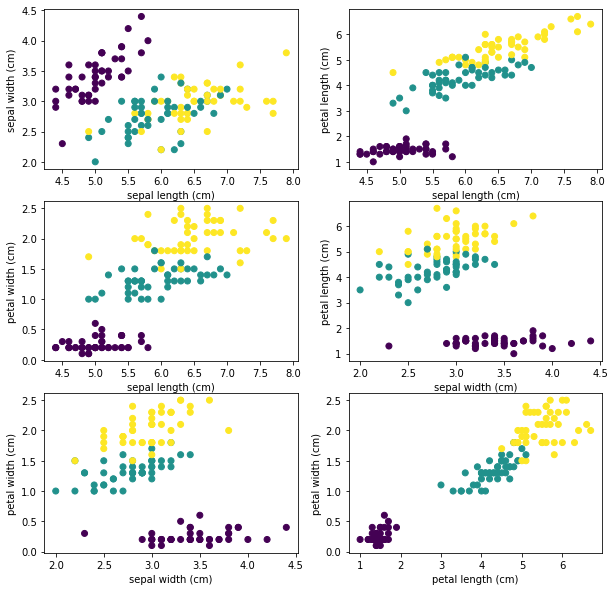

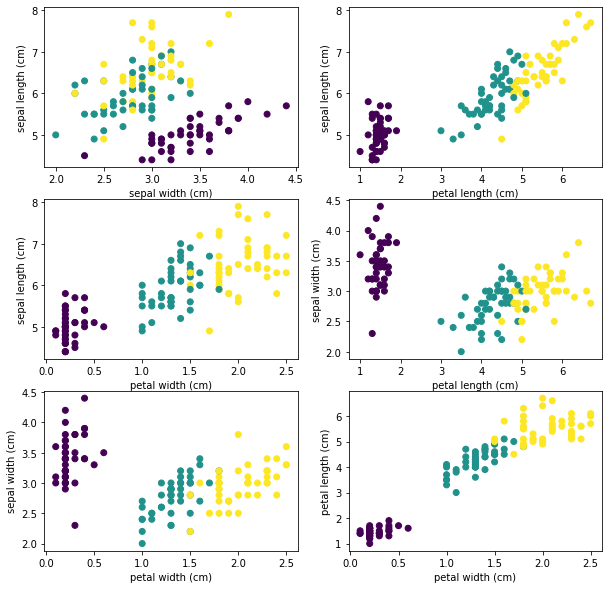

In [181]:
#Divide data into test-trainsplit
iris_x_train ,iris_x_test ,iris_y_train ,iris_y_test=  split_test_train(load_iris_data())
species_names=define_species_names(iris_y_train)

#Scatter Plot
plot_scatterplot( iris_x_train ,iris_x_test ,iris_y_train ,iris_y_test,generate_combinations())


**LINEAR REGRESSION**

In [182]:
class LinearReg():
  def __init__(self,λ=1e-1,lr=0.01):
    self.λ=λ
    self.lr=lr    

  def generate_weights(self):
    return (np.array([0,0]))

  def generate_costorweight(self):
    return [] 

  def generate_batcharrays(self,x_train,y_train,index):
    return x_train[index:index+32],y_train[index:index+32]
  
  def generate_squareofdiff(self, ybatch_array,y_predarray):
    return (np.sum(ybatch_array-y_predarray)**2)

  def predict(self, train_set):  
    weight1=self.weight[1]  
    weight0=self.weight[0]
    return (train_set.dot(weight1)+weight0)
  
 
  def generate_costperiteration(self,xbatch_array,ybatch_array):
    lamda=self.λ
    weight_square=self.weight[1]**2
    y_predarray=self.predict(xbatch_array)
    sq_diff_array=self.generate_squareofdiff(ybatch_array,y_predarray) 
    return (0.5*sq_diff_array) + (0.5*lamda*weight_square)


  def calculate_weights(self,x_train,y_train): 
    weight=self.weight
    lamda=self.λ   
    trainsetlength=trainset_len(x_train) 
    lr= self.lr
    y_predarray=self.predict(x_train) 
    lamdatimesweight=(lamda*weight[1]) 
    weight1=(((x_train).dot(y_predarray-y_train))+lamdatimesweight)/trainsetlength 
    weight0=np.sum(y_predarray-y_train)/trainsetlength
    self.weight=np.array([weight[0]-lr*weight0,weight[1]-lr*weight1])


  def fit(self,x_train,y_train):        
    self.x_train=x_train
    self.weight=self.generate_weights()
    self.cost=self.generate_costorweight()
    self.y_train=y_train   
    train_len=trainset_len(x_train) 
    for iterations in range(100):
        cost_iteration=0
        count_iteration=0        
        for index in range(0,train_len,32):
          xbatch_array,ybatch_array= self.generate_batcharrays(x_train,y_train,index)          
          self.calculate_weights(xbatch_array,ybatch_array)         
          cost_iteration+=self.generate_costperiteration(xbatch_array,ybatch_array)
          count_iteration+=1
        self.cost.append(cost_iteration/count_iteration)



           
      

**EXECUTION OF LINEAR REGRESSION**

 
Feature:  sepal length (cm)  Target:  sepal width (cm)


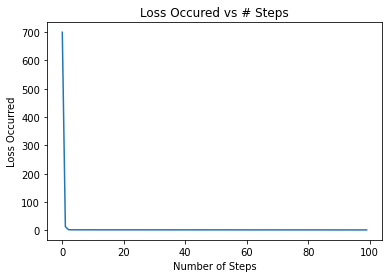

 
Feature:  sepal width (cm)  Target:  sepal length (cm)


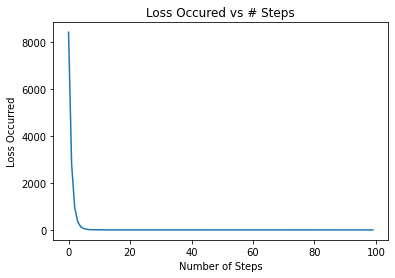

 
Feature:  sepal length (cm)  Target:  petal length (cm)


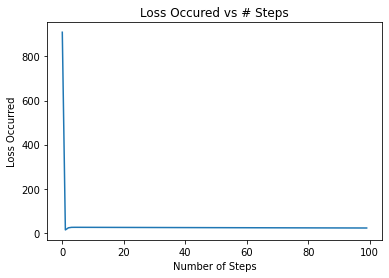

 
Feature:  petal length (cm)  Target:  sepal length (cm)


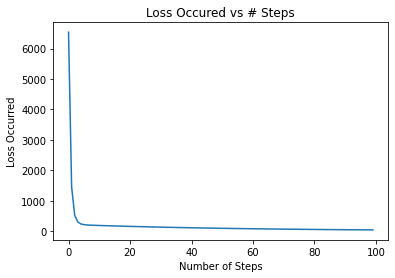

 
Feature:  sepal length (cm)  Target:  petal width (cm)


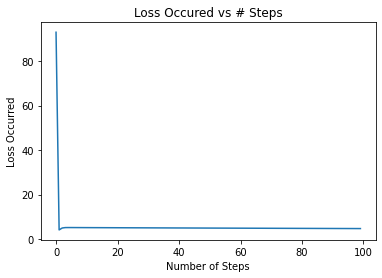

 
Feature:  petal width (cm)  Target:  sepal length (cm)


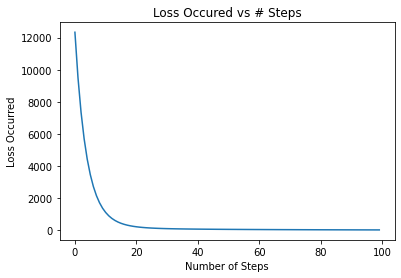

 
Feature:  sepal width (cm)  Target:  petal length (cm)


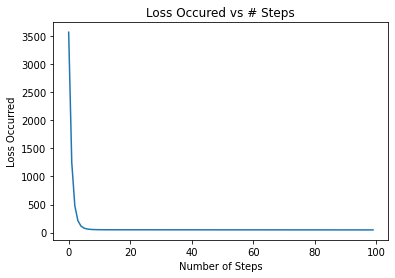

 
Feature:  petal length (cm)  Target:  sepal width (cm)


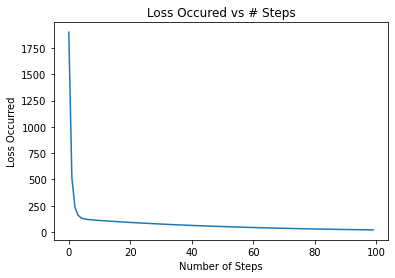

 
Feature:  sepal width (cm)  Target:  petal width (cm)


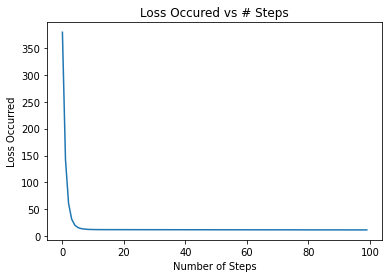

 
Feature:  petal width (cm)  Target:  sepal width (cm)


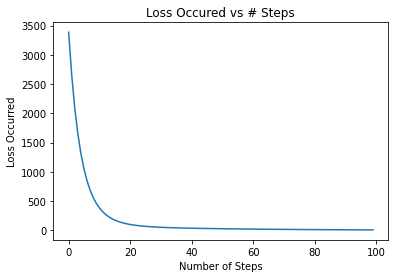

 
Feature:  petal length (cm)  Target:  petal width (cm)


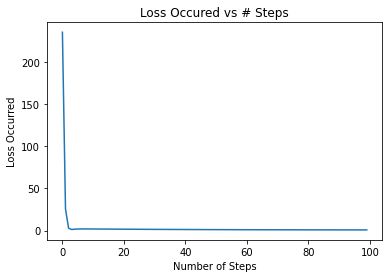

 
Feature:  petal width (cm)  Target:  petal length (cm)


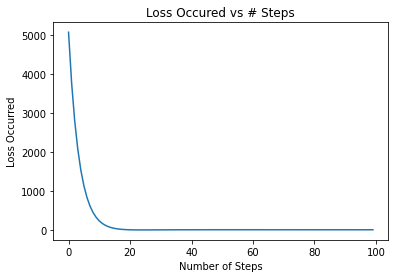

In [183]:
def performExecutionLinearReg(p,q,isPlotRequired=True,λ=0):
  #Create the train test data sets based on indices above  
  x_trainset,y_trainset,x_testset,y_testset =generatetraintestdata_LinearReg(iris_x_train,iris_x_test,p,q)

  #Create an object of LinearReg class above
  linearReg=LinearReg(λ=λ,lr=0.01)

  #Calling the fit function to train the model
  linearReg.fit(x_trainset,y_trainset)

  #Calling the predict function to predict on the test data
  predicteddata = linearReg.predict(x_testset)

  if isPlotRequired:
    plt.plot(range(100),linearReg.cost)
    plt.ylabel("Loss Occurred")
    plt.title("Loss Occured vs # Steps")
    plt.xlabel("Number of Steps")
    
    plt.show()

  #MSE for test class yactual vs ypredicted
  meansquareerror_value=mean_squared_error(y_testset,predicteddata)
  return linearReg,meansquareerror_value






#Generating random data for performing iterations
random_data=generate_randomdataset()
combinatory_data=generate_combinations()
len_combinatorydata= len(combinatory_data)
features=generatefeatures()
for index in range(len_combinatorydata):    
    random_combination=combinatory_data[index]
    random_index1=random_combination[0]
    random_index2=random_combination[1]
    
    print(" \nFeature: " ,features[random_index1  ] ,  " Target: ",features[ random_index2 ]  )
    linearreg,meansquareerror=performExecutionLinearReg (  random_index1 ,  random_index2 ,isPlotRequired =True  ,λ=0   )
    random_data= update_randomdataarray(random_data, meansquareerror,2*index,random_index1,random_index2)
    
    if index==0:        
        linearreg_new,meansquareerror_new=performExecutionLinearReg(random_index1,random_index2,isPlotRequired=False,λ=1)
        #Collecting the data of regularized vs non-regularized model
        index_new1,index_new2=random_index1,random_index2        
        weight_new0,weight_new1=linearreg_new.weight
        weight_0,weight_1=linearreg.weight

    print(" \nFeature: " ,features[random_index2  ] ,  " Target: ",features[ random_index1 ]  )
    linearreg, meansquareerror=performExecutionLinearReg(random_index2, random_index1, isPlotRequired =True  ,λ=0 )
    random_data= update_randomdataarray(random_data, meansquareerror,2*index+1,random_index1,random_index2)
    
    

**LINEAR REGRESSION RESULTS CONTINUED**

In [184]:
#Displaying the weight parameters
print("\n\n Weight Parameters for Regularized model:", ( weight_0,weight_1)  )

print("\n feature:", features[index_new1], "target:",features[  index_new2  ])

print("\n Weight Parameters for non-regularized model:", ( weight_new0,  weight_new1)  )

#Constructing the actual vs predicted data along with the error in a dataframe
iris_dataframe=pd.DataFrame( random_data  ,columns=[  "Feature","Target","Mean Square Error"]  )

#Displaying the dataframe
iris_dataframe




 Weight Parameters for Regularized model: (0.3761247509852242, 0.45589878528597794)

 feature: sepal length (cm) target: sepal width (cm)

 Weight Parameters for non-regularized model: (0.3954649617626067, 0.4518240420755373)


,Feature,Target,Mean Square Error
0,sepal length (cm),sepal width (cm),0.569464
1,sepal length (cm),sepal width (cm),2.009741
2,sepal length (cm),petal length (cm),1.801582
3,sepal length (cm),petal length (cm),0.688791
4,sepal length (cm),petal width (cm),0.321362
5,sepal length (cm),petal width (cm),0.398921
6,sepal width (cm),petal length (cm),5.137444
7,sepal width (cm),petal length (cm),0.735289
8,sepal width (cm),petal width (cm),0.729091
9,sepal width (cm),petal width (cm),0.541373


**LOGISTIC REGRESSION**

In [185]:
class LogisticReg():
  def __init__(self,λ=1e-1,lr=0.01):
    self.λ=λ
    self.lr=lr 

  def sigmoidfunction(self,R):
    exponentofR=np.exp(-R)
    sigmoidR=1/( 1+exponentofR) 
    return sigmoidR
 
  def generate_costorweight(self):
    return [] 

  def generate_uniqueclasses(self, y_train):
    return np.unique(y_train)

  def generate_bins(self, y_train,classlabel ):
    return np.where(y_train==classlabel,1,0)

  def generate_weights(self):
    return np.array([0, 0, 0])

  def generate_batcharrays(self,x_train,y_train,index):    
    return x_train[index:index+32],y_train[index:index+32]

  def calculate_weights(self,xbatch_array,ybatch_array):
    train_len=trainset_len(xbatch_array)
    weight=self.weight
    lamda=self.λ   
    lr= self.lr   

    y_sigmoid=self.sigmoidfunction(  (weight[0]+ (xbatch_array[:,0]*weight[1]) + (xbatch_array[:,1]*weight[2]))  )
    y_sigmoidbatch=(y_sigmoid-ybatch_array)
    y_sigmoidcomplement=1-y_sigmoid

    updated_weight2 = np.sum( y_sigmoid * y_sigmoidbatch * y_sigmoidcomplement * xbatch_array[:,1]+(lamda*weight[2]) )/train_len
    updated_weight1 = np.sum(y_sigmoidbatch * y_sigmoid * y_sigmoidcomplement * xbatch_array[:,0]+(lamda*weight[1]) )/train_len
    updated_weight0 = np.sum(y_sigmoidbatch * y_sigmoid * y_sigmoidcomplement )/train_len

    self.weight = np.array( [  weight[0]-lr*updated_weight0, weight[1]-lr*updated_weight1, weight[2]-lr*updated_weight2] )

  def generate_costperiteration(self,xbatch_array,ybatch_array):
    lamda=self.λ
    weight=self.weight
    y_sigmoid=self.sigmoidfunction(  (weight[0]+ (xbatch_array[:,0]*weight[1]) + (xbatch_array[:,1]*weight[2]))  )
    return (0.5*np.sum(ybatch_array-y_sigmoid)**2+0.5*lamda*(weight[1]**2+weight[2]**2) )
  

  def predict(self,x_train):
    predictions = [np.argmax([self.sigmoidfunction  (x_i[0]*w[1]+x_i[1]*w[2]+w[0])
                            for w in self.Weight])
                 for x_i in x_train]
    return np.array([self.classlabels[index] for index in predictions])


  def fit(self,x_train,y_train):
    self.x_train=x_train
    self.Weight=self.generate_costorweight()
    self.classcost=self.generate_costorweight()
    self.y_train=y_train
    self.classlabels=self.generate_uniqueclasses(y_train)

    for classlabel in self.classlabels:
      costs=self.generate_costorweight()
      y_bins=self.generate_bins(y_train,classlabel)
      self.weight=self.generate_weights()
      train_len=trainset_len(x_train)

      for iterations in range(100):
        cost_iteration=0
        count_iteration=0 
        for index in range(0,train_len,32):
          xbatch_array,ybatch_array= self.generate_batcharrays(x_train,y_train,index)
          self.calculate_weights(xbatch_array,ybatch_array)             
          cost_iteration+=self.generate_costperiteration(xbatch_array,ybatch_array)
          count_iteration+=1
        costs.append(cost_iteration/count_iteration)


      self.classcost.append( costs) 
      self.Weight.append(self.weight)
      self.cost=np.mean(self.classcost,  axis=0)

        

        
            
                  

**Execution for Logistic Regression**

 
Feature1 :  sepal length (cm)  Feature2:  sepal width (cm)


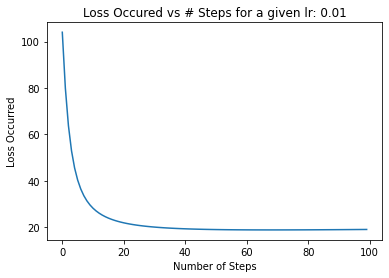

 
Feature1 :  sepal length (cm)  Feature2:  petal length (cm)


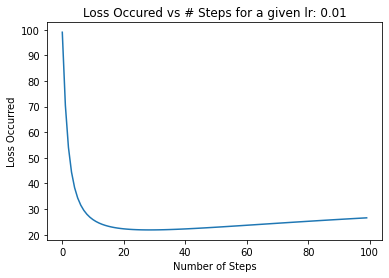

 
Feature1 :  sepal length (cm)  Feature2:  petal width (cm)


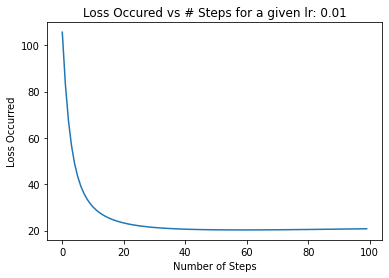

 
Feature1 :  sepal width (cm)  Feature2:  petal length (cm)


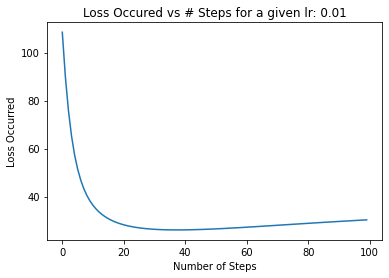

 
Feature1 :  sepal width (cm)  Feature2:  petal width (cm)


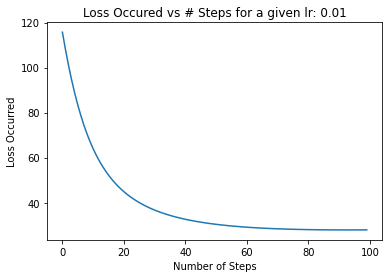

 
Feature1 :  petal length (cm)  Feature2:  petal width (cm)


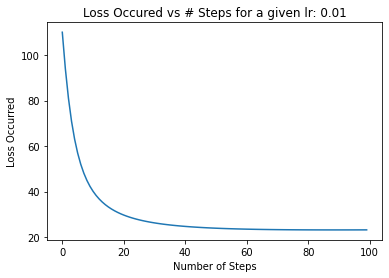


feature1:  sepal width (cm) feature2:  petal length (cm)


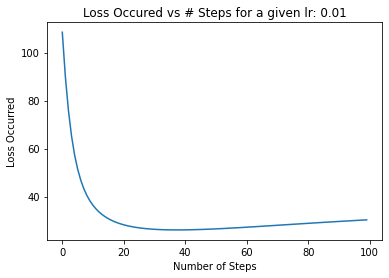

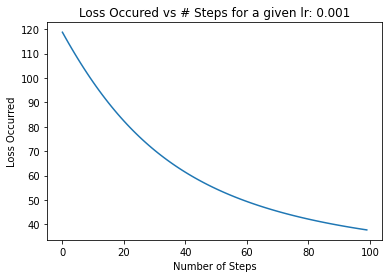

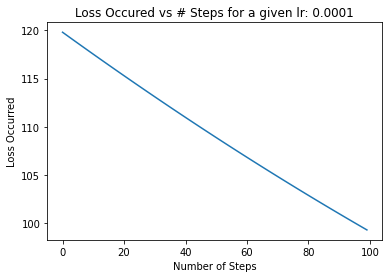

In [186]:
def performExecutionLogisticReg(p,isPlotRequired=True,lr=0.01):
  #Create the train test data sets based on indices above  
  x_trainset,x_testset, =generatetraintestdata_LogisticReg(iris_x_train,iris_x_test,p)
  y_trainset=iris_y_train
  y_testset=iris_y_test
  #Create an object of LinearReg class aobove
  logisticReg=LogisticReg(lr=lr)

  #Calling the fit function to train the model
  logisticReg.fit(x_trainset,y_trainset)

  #Calling the predict function to predict on the test data
  predicteddata = logisticReg.predict(x_testset)

  if isPlotRequired:
    plt.plot(range(100),logisticReg.cost)
    plt.ylabel("Loss Occurred")
    plt.title("Loss Occured vs # Steps for a given lr: " +str(lr))
    plt.xlabel("Number of Steps")    
    plt.show()

  #MSE for test class yactual vs ypredicted
  meansquareerror_value=mean_squared_error(y_testset,predicteddata)
  return logisticReg,meansquareerror_value




#Generating random data for performing iterations
random_data_lg=data = generate_randomdatatset_lg()
combinatory_data=generate_combinations()
len_combinatorydata= len(combinatory_data)
features=generatefeatures()

for index in range(len_combinatorydata):    
    random_combination=combinatory_data[index]
    comb_index=[random_combination[0], random_combination[1]]
    
    print(" \nFeature1 : " ,features[comb_index[0]  ] ,  " Feature2: ",features[ comb_index[1] ]  )
    logisticReg,meansquareerror = performExecutionLogisticReg(comb_index)
    random_data_lg[index][2] = meansquareerror/2
    random_data_lg[index][0] = features[comb_index[0]]
    random_data_lg[index][1] = features[comb_index[1]]
    
    
#Plotting Loss over steps for various values of lr
combinatorydata_3=combinatory_data[3]
index= [combinatorydata_3[0],combinatorydata_3[1]]
print("\nfeature1: ",features[index[0]], "feature2: ",features[index[1]])
for lr in [0.01,0.001,0.0001]:
  logisticReg,rootmeansquareerror=performExecutionLogisticReg(index,lr=lr)

In [187]:
#Constructing the actual vs predicted data along with the error in a dataframe for logistic regression
iris_dataframe_lg=pd.DataFrame( random_data_lg  ,columns=[  "Feature","Target","Mean Square Error"]  )

#Displaying the dataframe
iris_dataframe_lg


,Feature,Target,Mean Square Error
0,sepal length (cm),sepal width (cm),0.8
1,sepal length (cm),petal length (cm),0.8
2,sepal length (cm),petal width (cm),0.8
3,sepal width (cm),petal length (cm),0.8
4,sepal width (cm),petal width (cm),0.8
5,petal length (cm),petal width (cm),0.8


In [188]:
class NaiveBayes:
    
    def predict(self, X):
        predicteddata = [self.probability_of_class_labels(x) for x in X]
        return np.array(predicteddata)
        
    def probability_of_class_labels(self, x):
        variables_updates_list = list()
        for c in range(self.n_classes):
          mean = self.mean[c]
          variance = self.variance[c]
          variable = np.log(self.variable[c])
          variables_updates = np.sum(np.log(self.gaussian_density_function(x, mean, variance)))
          variables_updates = variable + variables_updates
          variables_updates_list.append(variables_updates)
        return np.argmax(variables_updates_list)
		
    def fit(self, X, y):
        self.n_samples, self.n_features = X.shape
        self.n_classes = len(np.unique(y))
        self.mean = np.zeros((self.n_classes, self.n_features))
        self.variance = np.zeros((self.n_classes, self.n_features))
        self.variable = np.zeros(self.n_classes)
        for c in range(self.n_classes):
            X_c = X[y == c]
            self.mean[c, :] = np.mean(X_c, axis=0)
            self.variance[c, :] = np.var(X_c, axis=0)
            self.variable[c] = X_c.shape[0] / self.n_samples
            
    def gaussian_density_function(self, x, mean, var):
        const = 1 / np.sqrt(var * 2 * np.pi)
        proba = np.exp(-0.5 * ((x - mean) ** 2 / var))
        return const * proba
    
    def accuracy_of_model(y_true, predicteddata):
            return np.sum(y_true==predicteddata) / len(y_true)
    
def performNBAnalysis(comb_index):
    x_trainset = iris_x_train[:, comb_index]
    y_trainset = iris_y_train
    x_testset = iris_x_test[:, comb_index]
    y_testset = iris_y_test
    nb = NaiveBayes()
    nb.fit(x_trainset, y_trainset)
    prediction = nb.predict(x_testset)
    meansquareerror = accuracy_score(y_testset, prediction)
    return nb, meansquareerror

random_data_lg=data = generate_randomdatatset_lg()
combinatory_data=generate_combinations()
len_combinatorydata= len(combinatory_data)
features=generatefeatures()

for index in range(len_combinatorydata):    
    random_combination=combinatory_data[index]
    comb_index=[random_combination[0], random_combination[1]]
    
    print(" \nFeature1 : " ,features[comb_index[0]  ] ,  " Feature2: ",features[ comb_index[1] ]  )
    logisticReg,meansquareerror_value = performNBAnalysis(comb_index)
    random_data_lg[index][2] = meansquareerror_value/2
    random_data_lg[index][0] = features[comb_index[0]]
    random_data_lg[index][1] = features[comb_index[1]]




 
Feature1 :  sepal length (cm)  Feature2:  sepal width (cm)
 
Feature1 :  sepal length (cm)  Feature2:  petal length (cm)
 
Feature1 :  sepal length (cm)  Feature2:  petal width (cm)
 
Feature1 :  sepal width (cm)  Feature2:  petal length (cm)
 
Feature1 :  sepal width (cm)  Feature2:  petal width (cm)
 
Feature1 :  petal length (cm)  Feature2:  petal width (cm)

feature1:  sepal width (cm) feature2:  petal length (cm)


TypeError: ignored

In [ ]:
#Constructing the actual vs predicted data along with the error in a dataframe for logistic regression
iris_dataframe_lg=pd.DataFrame( random_data_lg  ,columns=[  "Feature","Target","Mean Square Error"]  )

#Displaying the dataframe
iris_dataframe_lg
